In [15]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Bridge1.txt',index_col = 'Date', parse_dates = True)
data.columns = ['Total','East','West']
data.head()

,Total,East,West
Date,,,
2012-10-02 13:00:00,55,48,7
2012-10-02 14:00:00,130,75,55
2012-10-02 15:00:00,152,71,81
2012-10-02 16:00:00,278,111,167
2012-10-02 17:00:00,563,170,393


           Total       East       West
Date                                  
0     147.375000  76.208333  71.166667
1     155.400000  72.342857  83.057143
2     140.750000  71.000000  69.750000
3     135.875000  68.479167  67.395833
4     109.255319  54.702128  54.553191
5      83.583333  45.000000  38.583333
6      89.250000  49.625000  39.625000


<Axes: >

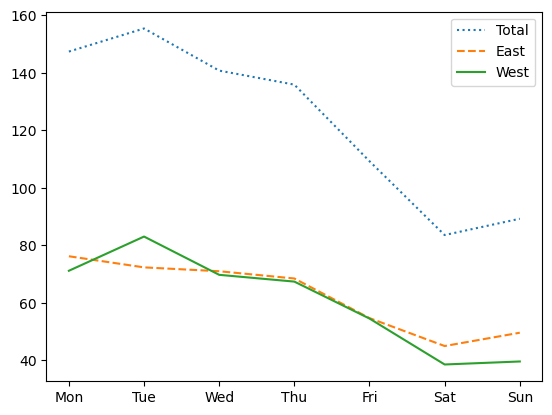

In [53]:
 # i) Average daily bicycle counts 
avg_daily_count = data.groupby(data.index.dayofweek).mean()
print(avg_daily_count)
avg_daily_count.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
avg_daily_count.plot(style = [':','--','-'])

                   Total        East        West
        Date                                    
Weekday 0      14.500000    6.250000    8.250000
        1       6.750000    3.250000    3.500000
        2       6.000000    3.750000    2.250000
        3       4.750000    1.875000    2.875000
        4       7.500000    5.375000    2.125000
        5      23.375000   14.750000    8.625000
        6     121.375000   78.000000   43.375000
        7     314.000000  223.875000   90.125000
        8     406.375000  276.625000  129.750000
        9     233.875000  148.000000   85.875000
        10     88.875000   51.375000   37.500000
        11     79.000000   42.250000   36.750000
        12     87.875000   45.750000   42.125000
        13     94.000000   50.000000   44.000000
        14    110.777778   59.111111   51.666667
        15    146.000000   71.000000   75.000000
        16    259.888889  110.666667  149.222222
        17    515.666667  163.888889  351.777778
        18    336.00

Text(0, 0.5, 'Avg Bicycle Count')

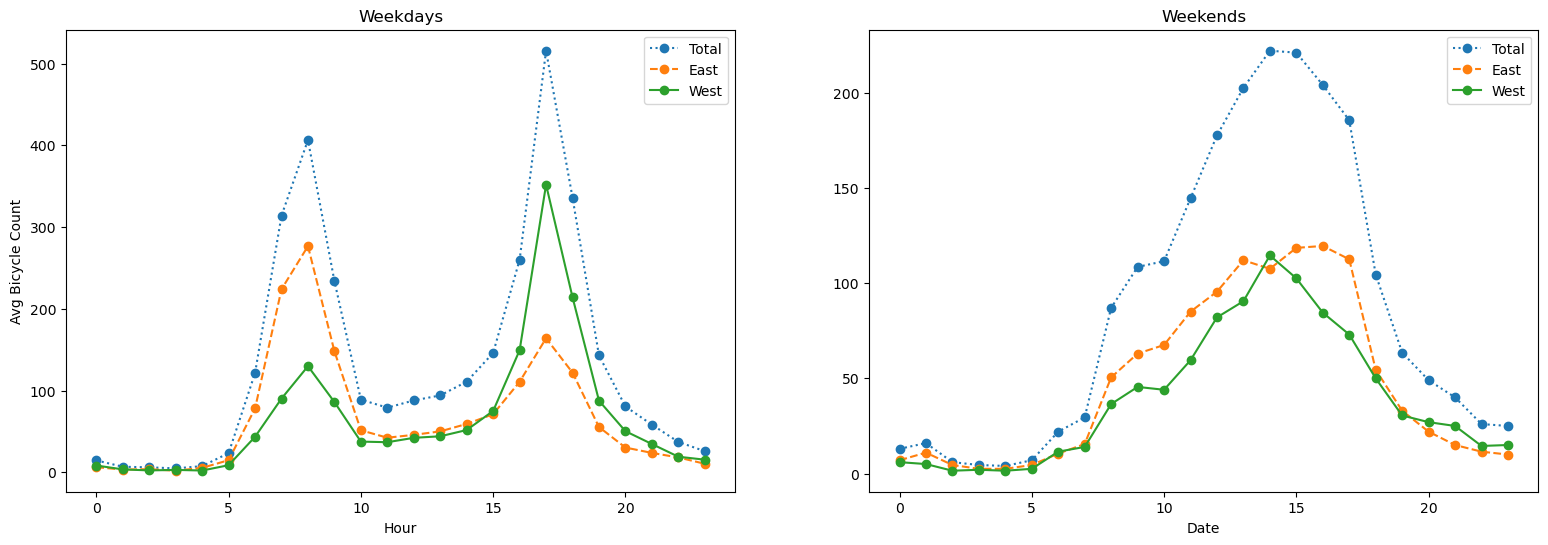

In [49]:
 # ii) Average hourly bicycle counts by weekday and weekend.
 import numpy as np
 days = np.where(data.index.dayofweek < 5, 'Weekday','Weekend')
 avg_hourly_count = data.groupby([days,data.index.hour]).mean()
 print(avg_hourly_count)
 fig, ax = plt.subplots(1, 2, figsize=(19, 6))
 avg_hourly_count.loc['Weekday'].plot(ax=ax[0],title = 'Weekdays', style = [':','--','-'],marker='o')
 avg_hourly_count.loc['Weekend'].plot(ax=ax[1],title = 'Weekends', style = [':','--','-'],marker='o')
 ax[0].set_xlabel('Hour')
 ax[0].set_ylabel('Avg Bicycle Count')